In [1]:
from tensorflow import keras
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from matplotlib import pyplot
from keras import datasets
from keras.applications.mobilenet_v2 import MobileNetV2

import numpy as np
import matplotlib.pyplot as plt

In [2]:
batch_size = 32  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 100
data_augmentation = False

In [3]:
#flags de teste
data_augmentation = False


In [4]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2,
)

augmented_data = datagen.flow(x_train, y_train, batch_size=len(x_train), shuffle=False)
x_train_augmented, y_train_augmented = next(augmented_data)

# Adicione os dados aumentados ao conjunto original
x_train = np.vstack((x_train, x_train_augmented))
y_train = np.vstack((y_train, y_train_augmented))


In [6]:
#One Hot Encoding Labels from Train and Test Dataset
from keras.utils import to_categorical

y_train = to_categorical(y_train,  10)
y_test = to_categorical(y_test, 10)

In [7]:
from sklearn.utils import shuffle

x_train, y_train = shuffle(x_train, y_train)

In [8]:
x_train, x_test = x_train / 255, x_test / 255

In [9]:
IMG_SHAPE = (32, 32, 3)
# Pre-trained model with MobileNetV2
base_model = MobileNetV2(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)
# Freeze the pre-trained model weights
base_model.trainable = True

for layer in base_model.layers[:100]:
  layer.trainable =  False



# Trainable classification head
maxpool_layer = GlobalMaxPooling2D()
prediction_layer = Dense(units=10, activation='softmax')
# Layer classification head with feature detector
model = Sequential([
    base_model,
    maxpool_layer,
    prediction_layer
])

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',#devido as classes serem numericas
              metrics=['accuracy'])

In [11]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

x_train shape: (100000, 32, 32, 3)
y_train shape: (100000, 10)


In [12]:
model_history= model.fit(x_train, y_train, epochs=10)


Epoch 1/10
3125/3125 [==============================] - 219s 68ms/step - loss: 1.4908 - accuracy: 0.5186
Epoch 2/10
3125/3125 [==============================] - 210s 67ms/step - loss: 1.2478 - accuracy: 0.5983
Epoch 3/10
3125/3125 [==============================] - 211s 67ms/step - loss: 1.1936 - accuracy: 0.6120
Epoch 4/10
3125/3125 [==============================] - 212s 68ms/step - loss: 1.1457 - accuracy: 0.6311
Epoch 5/10
3125/3125 [==============================] - 211s 68ms/step - loss: 1.0955 - accuracy: 0.6416
Epoch 6/10
3125/3125 [==============================] - 211s 68ms/step - loss: 1.0368 - accuracy: 0.6587
Epoch 7/10
3125/3125 [==============================] - 210s 67ms/step - loss: 1.0485 - accuracy: 0.6543
Epoch 8/10
3125/3125 [==============================] - 209s 67ms/step - loss: 1.0212 - accuracy: 0.6630
Epoch 9/10
3125/3125 [==============================] - 210s 67ms/step - loss: 1.0036 - accuracy: 0.6671
Epoch 10/10
3125/3125 [==============================] 

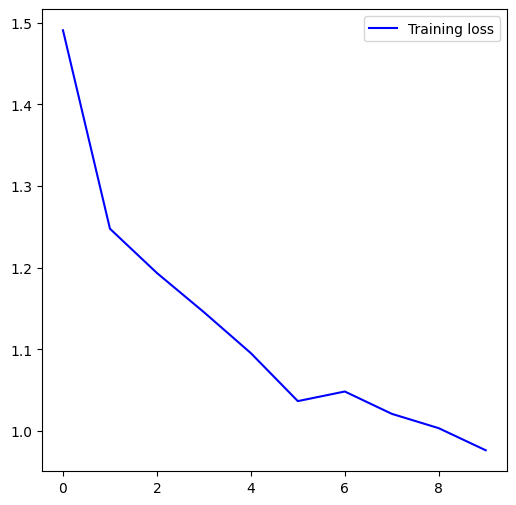

<Figure size 640x480 with 0 Axes>

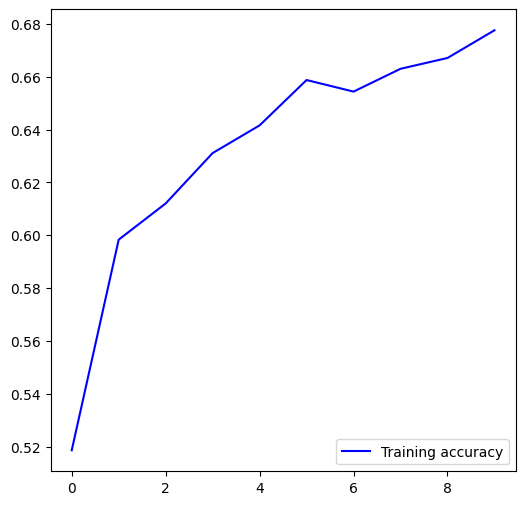

In [13]:
plt.figure(figsize=(6,6))
plt.plot(model_history.history['loss'], color='b', label="Training loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(6,6))
plt.plot(model_history.history['accuracy'], color='b', label="Training accuracy")
plt.legend(loc = "lower right")
plt.show()

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import multilabel_confusion_matrix

rounded_labels=np.argmax(y_test, axis=1)

preds = model.predict(x_test, batch_size = 100, verbose = 1)
preds = np.argmax(preds, axis=1) # to get the indices of max value in each row
cr = confusion_matrix(rounded_labels, preds)
print("The confusion Matrix: \n",cr)

100/100 [==============================] - 5s 44ms/step
The confusion Matrix: 
 [[632   9  59  16  31   4  10  35 152  52]
 [ 14 679   7   0   4   1  18  11 147 119]
 [ 32   4 587  60 106  19  89  71  22  10]
 [ 10  15  70 486  59  80 122  71  49  38]
 [  8   4  46  32 680  13  74 116  21   6]
 [  6   5  49 175  60 489  55 127  16  18]
 [  5   3  32 137  42  13 724  19  21   4]
 [  5   3  17  22  43  10  14 861   6  19]
 [ 26  11  12   7   8   1   2   4 898  31]
 [ 14  52   2  10   8   0   5  16  58 835]]


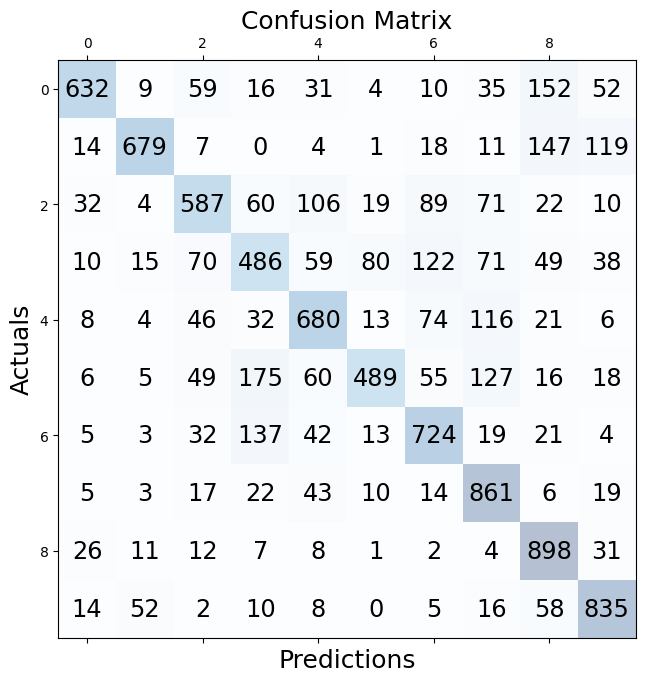

In [15]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cr, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cr.shape[0]):
    for j in range(cr.shape[1]):
        ax.text(x=j, y=i,s=cr[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [16]:
print(classification_report(rounded_labels, preds))

              precision    recall  f1-score   support

           0       0.84      0.63      0.72      1000
           1       0.86      0.68      0.76      1000
           2       0.67      0.59      0.62      1000
           3       0.51      0.49      0.50      1000
           4       0.65      0.68      0.67      1000
           5       0.78      0.49      0.60      1000
           6       0.65      0.72      0.69      1000
           7       0.65      0.86      0.74      1000
           8       0.65      0.90      0.75      1000
           9       0.74      0.83      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.68     10000
weighted avg       0.70      0.69      0.68     10000

